In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [2]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Movie_Actors.csv has 143869 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/movies-1990-to-2017/Movie_Actors.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Movie_Actors.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [4]:
df1.head(5)

,Unnamed: 0,Actors,imdbID
0,0,Cass Barbera,tt2268369
1,2,Charles A. Post,tt0016750
2,3,Samuel Green,tt3405286
3,4,Surin Mendis,tt3816698
4,7,Baby Rube,tt0328410


In [5]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Movie_AdditionalRating.csv has 92016 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../input/movies-1990-to-2017/Movie_AdditionalRating.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Movie_AdditionalRating.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


In [7]:
df2.head(5)

,Unnamed: 0,Rating,RatingSource,imdbID
0,0,6.9/10,Internet Movie Database,tt1006835
1,1,2.4/10,Internet Movie Database,tt2554714
2,2,6.3/10,Internet Movie Database,tt1090670
3,3,5.5/10,Internet Movie Database,tt1990255
4,4,5.0/10,Internet Movie Database,tt0206367


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


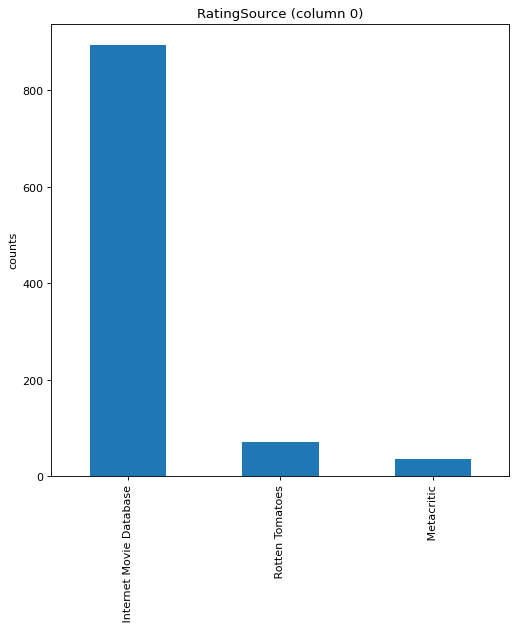

In [8]:
plotPerColumnDistribution(df2, 10, 5)

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Movie_Genres.csv has 308565 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('../input/movies-1990-to-2017/Movie_Genres.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Movie_Genres.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [10]:
df3.head(5)

,Unnamed: 0,Genre,imdbID
0,0,Short,tt2268369
1,1,Drama,tt2268369
2,2,Short,tt1560760
3,3,Drama,tt1560760
4,4,Drama,tt0016750


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


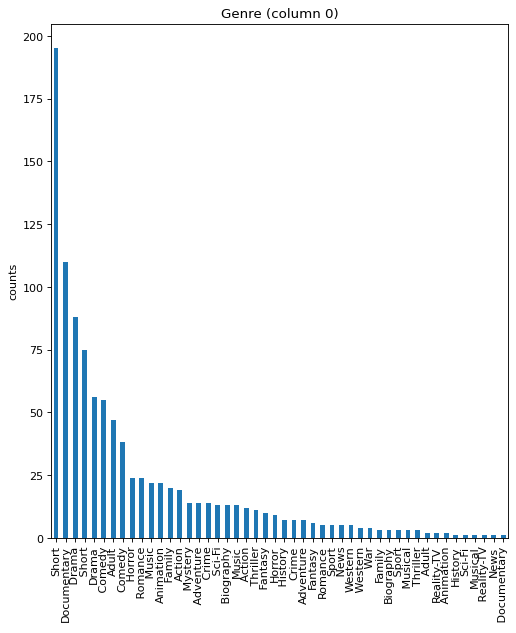

In [11]:
plotPerColumnDistribution(df3, 10, 5)